In [3]:
import pandas as pd
import numpy as np
from twarc import Twarc
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../data/Organic_extended_finalv2.csv", sep="|")

In [3]:
access_token = "1241834718041079813-0B4rNE3kxH0UqwGQjnmj5ev1COe5Ai"
access_token_secret = "QE4BNkVDCdCMao1Dy3iIA0k8Mxo3zEG9LMRNdGf9foVo2"
consumer_key = "jgEpawjd9vW6Rldr9ipAMiSpI"
consumer_secret = "BOxMYACTAsq8pPc6RtuSaz6MxjtHdxQrJfPD7XenUZldQFbEBD"

In [4]:
t = Twarc(consumer_key, consumer_secret, access_token, access_token_secret)

In [5]:
df

,Unnamed: 0,tweet_id,count,created_time,next_update,1,2,3,4,5,...,95,96,97,98,99,100,user_id,screen_name,url,follower_count
0,0,1272173594043453440,2,2020-06-14 14:26:35+00:00,2020-06-16 14:26:35+00:00,8597,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,5392522,NPR,https://trib.al/cwVYarO,8266379
1,1,1272182279062933504,2,2020-06-14 15:01:05+00:00,2020-06-16 15:01:05+00:00,215,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,759251,CNN,https://cnn.it/2MUIX15,48816960
2,2,1272185281119227907,2,2020-06-14 15:13:01+00:00,2020-06-16 15:13:01+00:00,1166,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,14173315,NBC News,https://nbcnews.to/3e240uM,7668492
3,3,1272187048804462592,2,2020-06-14 15:20:03+00:00,2020-06-16 15:20:03+00:00,243,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,807095,The New York Times,https://nyti.ms/37tk3iz,46860952
4,4,1272189836657598465,2,2020-06-14 15:31:07+00:00,2020-06-16 15:31:07+00:00,809,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,759251,CNN,https://cnn.it/30H1m9K,48816960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21017,21017,1277733354352320513,2,Mon Jun 29 22:39:05 +0000 2020,2020-07-01 22:39:05+00:00,54,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,14173315,NBC News,https://nbcnews.to/3idNhXI,7668499
21018,21018,1277733590047088642,2,Mon Jun 29 22:40:01 +0000 2020,2020-07-01 22:40:01+00:00,81,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,807095,The New York Times,https://nyti.ms/2BlCSJ2,46860975
21019,21019,1277734842365591553,2,Mon Jun 29 22:45:00 +0000 2020,2020-07-01 22:45:00+00:00,296,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1652541,Reuters,https://reut.rs/3ibTt2D,22072249
21020,21020,1277734842591883264,2,Mon Jun 29 22:45:00 +0000 2020,2020-07-01 22:45:00+00:00,179,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,759251,CNN,url,48817002


In [7]:
# get rows with only 7 days or more of data, drop all other rows and unused columns
columns = ["tweet_id", "count", "created_time", "1", "2", "3", "4", "5", "6","7", "user_id", "screen_name", "url", "follower_count"]
one_week = pd.DataFrame(columns=columns)
df.drop(df[df["7"] == -1].index, inplace=True)
one_week = df.drop(columns=df.columns[(df == -1).any()])
one_week

,Unnamed: 0,tweet_id,count,created_time,next_update,1,2,3,4,5,6,7,user_id,screen_name,url,follower_count
6,6,1272196794747772930,17,2020-06-14 15:58:46+00:00,2020-07-01 15:58:46+00:00,3528,3672,3691,3693,3694,3695,3693,16664681,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3634118
7,7,1272197608841211905,17,2020-06-14 16:02:00+00:00,2020-07-01 16:02:00+00:00,498,521,529,528,529,530,530,16664681,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3634118
8,8,1272197741230411787,17,2020-06-14 16:02:32+00:00,2020-07-01 16:02:32+00:00,679,682,682,682,681,681,682,759251,CNN,https://cnn.it/37vTqJO,48816960
9,9,1272197312991789056,17,2020-06-14 16:00:50+00:00,2020-07-01 16:00:50+00:00,922,969,976,975,976,977,976,16664681,Los Angeles Times,https://www.latimes.com/california/story/2020-...,3634118
10,10,1272197128014749696,17,2020-06-14 16:00:06+00:00,2020-07-01 16:00:06+00:00,457,463,463,466,467,467,467,28785486,ABC News,https://abcn.ws/2UDj5ep,15735836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12491,12491,1275560184845406214,8,Tue Jun 23 22:43:41 +0000 2020,2020-07-01 22:43:41+00:00,184,188,188,188,188,188,188,3108351,The Wall Street Journal,https://on.wsj.com/2BvvBpV,17862845
12492,12492,1275560263513567233,8,Tue Jun 23 22:44:00 +0000 2020,2020-07-01 22:44:00+00:00,52,52,52,52,52,52,51,15754281,USA TODAY,https://bit.ly/2ByNKDf,4102123
12493,12493,1275560371764379648,8,Tue Jun 23 22:44:26 +0000 2020,2020-07-01 22:44:26+00:00,118,118,117,117,117,117,116,759251,CNN,http://cnn.it/37WP6DR,48816979
12494,12494,1275560575230066688,8,Tue Jun 23 22:45:14 +0000 2020,2020-07-01 22:45:14+00:00,11,11,11,11,11,11,11,16664681,Los Angeles Times,url,3634119


In [8]:
max_list = list()
for index, row in df.iterrows():
    num_list = list()
    num_list = {row["1"], row["2"],row["3"], row["4"],row["5"], row["6"]}
    max_list.append(max(num_list))
df["max_retweets"] = max_list

In [9]:
max_list

[3695,
 530,
 682,
 977,
 467,
 352,
 833,
 542,
 177,
 1730,
 144,
 1321,
 467,
 163,
 250,
 936,
 2381,
 66,
 267,
 938,
 33,
 72,
 166,
 48,
 41,
 70,
 386,
 634,
 151,
 761,
 31,
 2649,
 125,
 39,
 275,
 89,
 123,
 149,
 1194,
 426,
 57,
 62,
 49,
 117,
 397,
 139,
 120,
 58,
 190,
 207,
 156,
 112,
 1603,
 391,
 53,
 151,
 125,
 40,
 33,
 208,
 2661,
 207,
 153,
 493,
 47,
 177,
 52,
 71,
 21,
 392,
 101,
 169,
 2210,
 496,
 77,
 50,
 66,
 142,
 48,
 76,
 144,
 145,
 2300,
 53,
 874,
 59,
 152,
 35,
 2509,
 244,
 202,
 66,
 2107,
 114,
 18,
 299,
 338,
 50,
 79,
 3310,
 1927,
 872,
 410,
 299,
 1465,
 140,
 19,
 1291,
 131,
 77,
 298,
 23,
 18,
 1509,
 330,
 166,
 37,
 259,
 171,
 131,
 360,
 107,
 2654,
 873,
 1797,
 173,
 116,
 119,
 76,
 75,
 29,
 614,
 249,
 192,
 397,
 46,
 63,
 3922,
 119,
 953,
 170,
 148,
 104,
 27,
 7,
 877,
 370,
 108,
 185,
 46,
 36,
 4073,
 505,
 274,
 276,
 29,
 80,
 225,
 215,
 73,
 390,
 1564,
 1815,
 301,
 91,
 198,
 619,
 92,
 249,
 101,
 58,
 279

In [10]:
mean = df["max_retweets"].mean()
median = df["max_retweets"].median()
print("mean: ", mean, "\nmedian: ", median)

mean:  144.079085973584 
median:  49.0


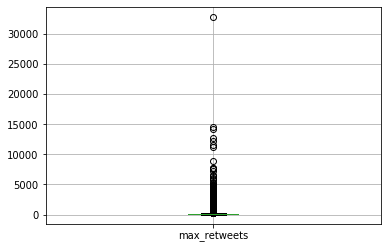

In [11]:
boxplot = df.boxplot(column=['max_retweets'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126816950>]],
      dtype=object)

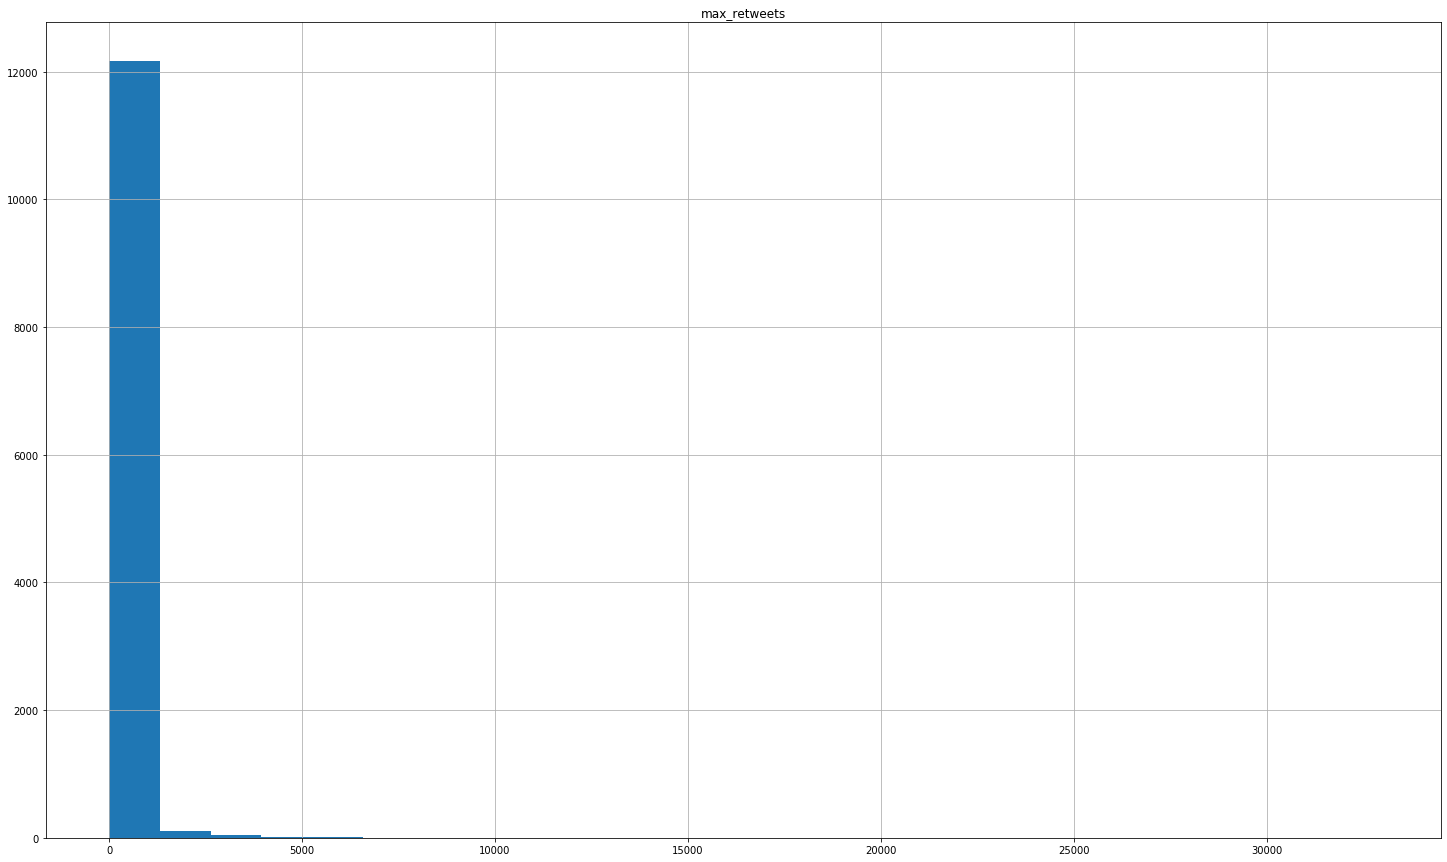

In [12]:
df.hist(column='max_retweets', bins=25, figsize=(25,15))

In [13]:
# Remove outliers
q_low = df["max_retweets"].quantile(0.01)
q_hi  = df["max_retweets"].quantile(0.99)
df_filtered = df[(df["max_retweets"] < q_hi) & (df["max_retweets"] > q_low)]



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1293c3cd0>]],
      dtype=object)

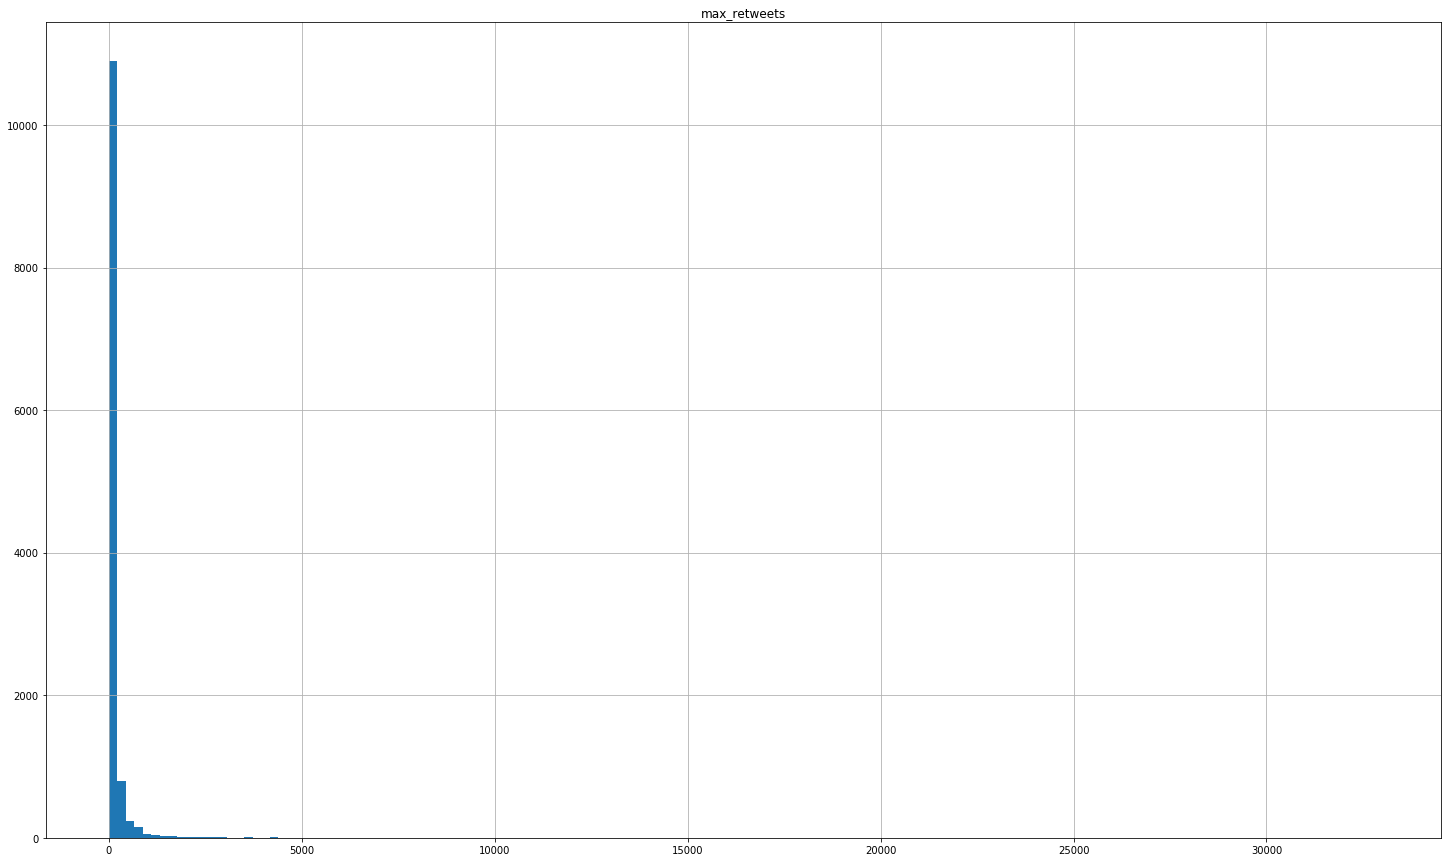

In [15]:
df.hist(column='max_retweets', bins=150, figsize=(25,15))

In [16]:
df.max_retweets.quantile([0.25,0.5,0.75])

0.25     24.0
0.50     49.0
0.75    108.0
Name: max_retweets, dtype: float64

In [15]:
accounts = ["CNN","The Wall Street Journal","The Washington Post","NBC News",
            "The Associated Press","ABC News","Los Angeles Times","The New York Times","NPR","TIME","U.S. News","USA TODAY",
            "Fox News","Reuters","HuffPost"]
outlet_lists = {}
for outlet in accounts:
    outlet_lists[outlet] = []

In [16]:
for index, row in one_week.iterrows():
    outlet_lists[row["screen_name"]].append(row["max_retweets"])
outlet_lists

{'CNN': [682,
  833,
  542,
  936,
  386,
  275,
  149,
  426,
  190,
  156,
  1603,
  493,
  2210,
  2300,
  2509,
  298,
  330,
  360,
  1797,
  249,
  63,
  953,
  370,
  108,
  274,
  225,
  198,
  279,
  93,
  155,
  412,
  123,
  217,
  185,
  133,
  140,
  32,
  1095,
  848,
  282,
  342,
  143,
  73,
  175,
  70,
  209,
  126,
  266,
  206,
  544,
  480,
  623,
  114,
  127,
  452,
  111,
  73,
  97,
  68,
  83,
  125,
  406,
  90,
  195,
  147,
  94,
  1046,
  79,
  193,
  79,
  260,
  272,
  138,
  81,
  20,
  224,
  46,
  57,
  462,
  241,
  791,
  164,
  177,
  77,
  1206,
  101,
  61,
  106,
  216,
  249,
  117,
  138,
  220,
  347,
  198,
  122,
  139,
  602,
  48,
  504,
  722,
  771,
  731,
  175,
  459,
  245,
  85,
  113,
  703,
  264,
  113,
  320,
  167,
  1174,
  217,
  242,
  308,
  236,
  166,
  96,
  197,
  41,
  67,
  362,
  975,
  134,
  211,
  676,
  147,
  61,
  193,
  64,
  111,
  135,
  1116,
  58,
  99,
  348,
  220,
  23,
  165,
  144,
  59,
  236,
  270

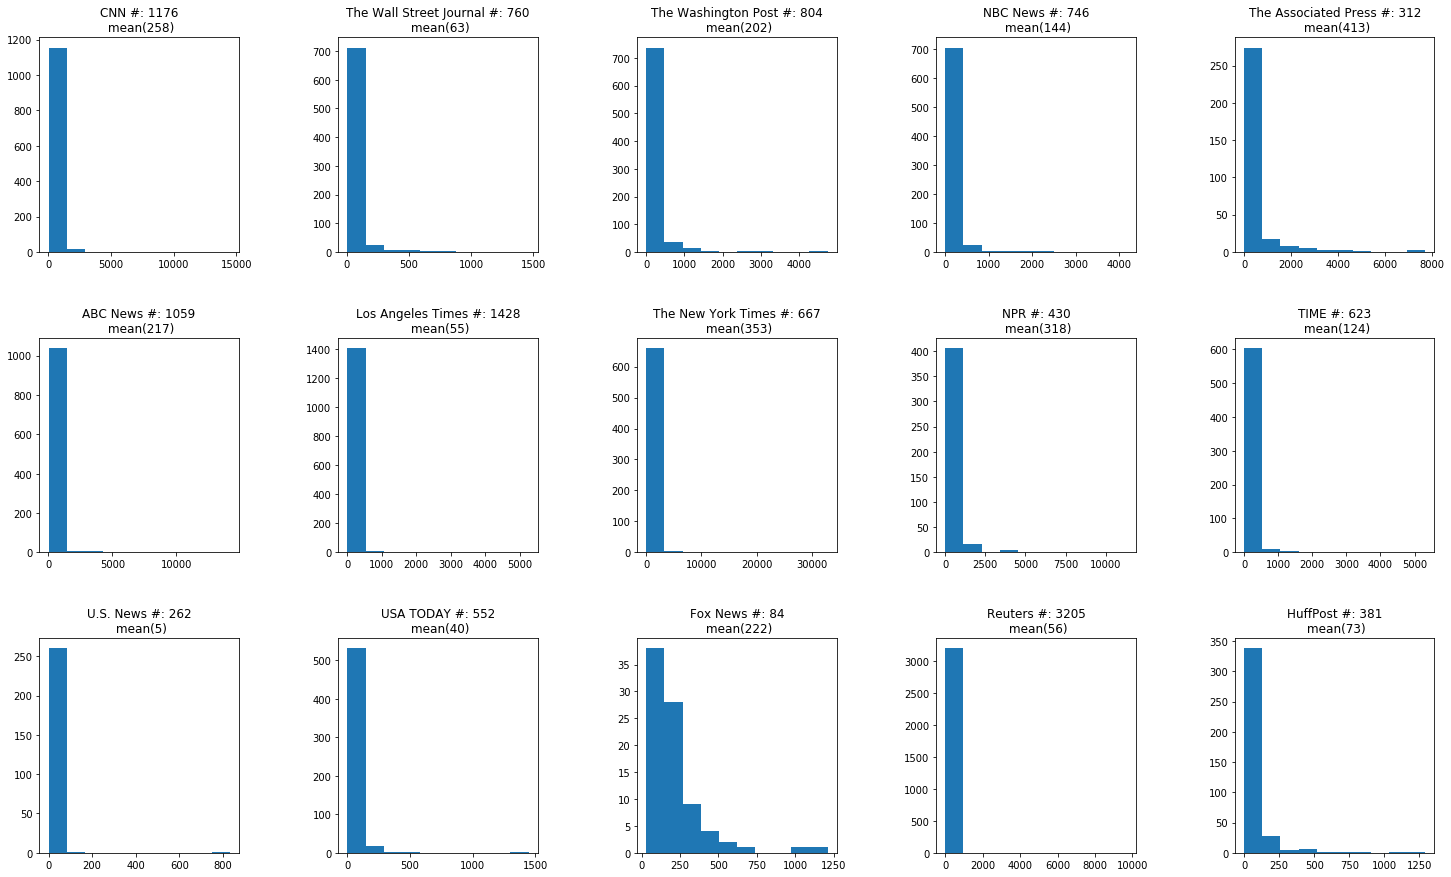

In [17]:
count = 1
fig = plt.figure(figsize=(25, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)

for key, value in outlet_lists.items():
    ax = fig.add_subplot(3, 5, count)
    ax.hist(value, density=False, bins=10) 
    mean = str(int(scipy.mean(value)))
    tweets = str(len(value))
    ax.title.set_text(str(key + " #: " + tweets + "\n mean(" + mean + ")"))
    
    #ax.text(25, 35, str("mean: " + mean),fontsize=8, ha='center')
    #plt.subplot(5,3,count)
    #plt.hist(outlet_lists['CNN'], density=False, bins=10) 
    count += 1

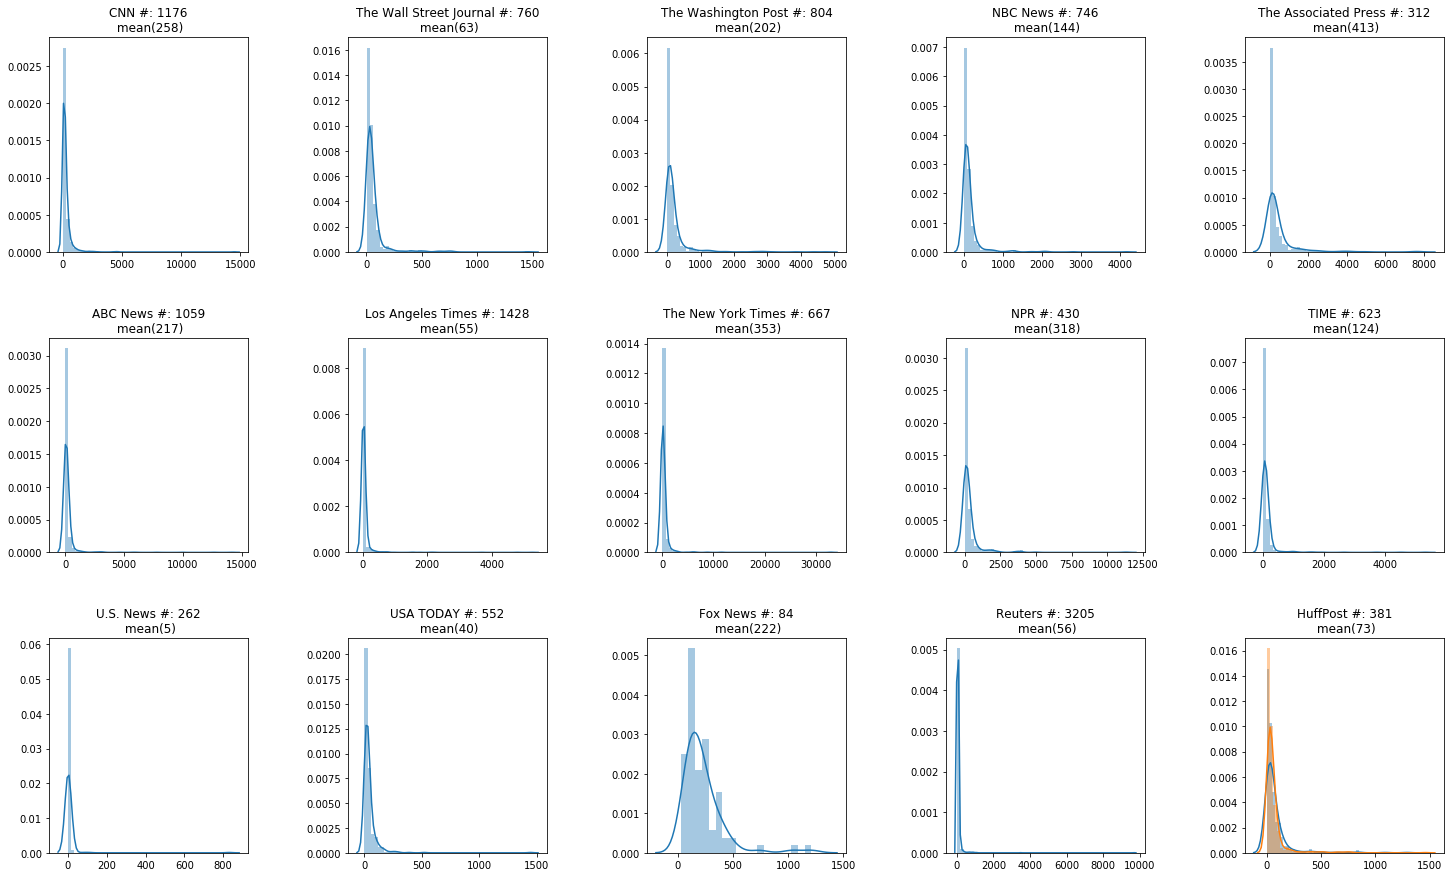

In [23]:
count = 1
fig = plt.figure(figsize=(25, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
means = {}
for key, value in outlet_lists.items():
    ax = fig.add_subplot(3, 5, count)
    sns.distplot(value, ax=ax)
    #ax.hist(value, density=False, bins=10) 
    mean = str(int(scipy.mean(value)))
    tweets = str(len(value))
    ax.title.set_text(str(key + " #: " + tweets + "\n mean(" + mean + ")"))
    means[key] = int(mean)
    #ax.text(25, 35, str("mean: " + mean),fontsize=8, ha='center')
    #plt.subplot(5,3,count)
    #plt.hist(outlet_lists['CNN'], density=False, bins=10) 
    count += 1
sns.distplot(outlet_lists["The Wall Street Journal"])

In [35]:
followers = {}
names = list()
for index, row in one_week.iterrows():
    if row["screen_name"] not in followers:
        followers[row["screen_name"]] = row["follower_count"]

In [36]:
followers

{'Los Angeles Times': 3634118,
 'CNN': 48816960,
 'ABC News': 15735836,
 'Reuters': 22072299,
 'The New York Times': 46860952,
 'NPR': 8266379,
 'The Washington Post': 16033595,
 'The Wall Street Journal': 17862846,
 'The Associated Press': 14315716,
 'NBC News': 7668492,
 'TIME': 17289096,
 'USA TODAY': 4102122,
 'HuffPost': 11454184,
 'U.S. News': 155571,
 'Fox News': 19373896}

In [37]:
means

{'CNN': 258,
 'The Wall Street Journal': 63,
 'The Washington Post': 202,
 'NBC News': 144,
 'The Associated Press': 413,
 'ABC News': 217,
 'Los Angeles Times': 55,
 'The New York Times': 353,
 'NPR': 318,
 'TIME': 124,
 'U.S. News': 5,
 'USA TODAY': 40,
 'Fox News': 222,
 'Reuters': 56,
 'HuffPost': 73}

In [38]:
follower_mean = list()
names = list()
for i in followers.items():
    follower_mean.append((i[1], means[i[0]]))
    names.append(i[0])

In [31]:
follower_mean

[(3634118, 55),
 (48816960, 258),
 (15735836, 217),
 (22072299, 56),
 (46860952, 353),
 (8266379, 318),
 (16033595, 202),
 (17862846, 63),
 (14315716, 413),
 (7668492, 144),
 (17289096, 124),
 (4102122, 40),
 (11454184, 73),
 (155571, 5),
 (19373896, 222)]

In [39]:
names

['Los Angeles Times',
 'CNN',
 'ABC News',
 'Reuters',
 'The New York Times',
 'NPR',
 'The Washington Post',
 'The Wall Street Journal',
 'The Associated Press',
 'NBC News',
 'TIME',
 'USA TODAY',
 'HuffPost',
 'U.S. News',
 'Fox News']

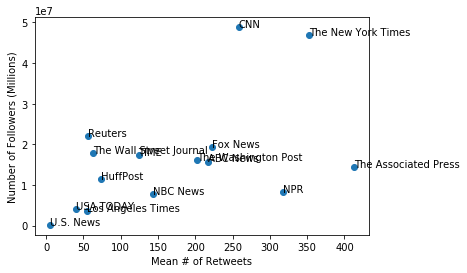

In [44]:
# mean of retweets vs amt of followers
x,y = zip(*follower_mean)
fig, ax = plt.subplots()
ax.scatter(y, x)
plt.xlabel('Mean # of Retweets')
plt.ylabel('Number of Followers (Millions)')

for i, txt in enumerate(names):
    ax.annotate(txt, (y[i], x[i]))

In [34]:
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.2517245296925549

In [46]:
one_week.sort_values(by=['max_retweets'], inplace=True, ascending=False)

In [47]:
one_week.head()

,Unnamed: 0,tweet_id,count,created_time,next_update,1,2,3,4,5,6,7,user_id,screen_name,url,follower_count,max_retweets
8655,8655,1274554545100730368,10,Sun Jun 21 04:07:38 +0000 2020,2020-07-01 04:07:38+00:00,30579,32769,32870,32870,32854,32834,32821,807095,The New York Times,https://nyti.ms/2YhJG35,46860963,32870
1729,1729,1272969707767975937,15,Tue Jun 16 19:10:03 +0000 2020,2020-07-01 19:10:03+00:00,13835,14425,14472,14480,14481,14477,14473,759251,CNN,https://cnn.it/2N0Hfvr,48816959,14481
12334,12334,1275528907777810435,8,Tue Jun 23 20:39:24 +0000 2020,2020-07-01 20:39:24+00:00,13252,14038,14118,14142,14168,14182,14182,28785486,ABC News,https://abcn.ws/31aJhRG,15735841,14182
8224,8224,1274426525706866691,11,Sat Jun 20 19:38:56 +0000 2020,2020-07-01 19:38:56+00:00,11974,12538,12624,12631,12632,12642,12639,28785486,ABC News,https://abcn.ws/2NeUMPZ,15735839,12642
12093,12093,1275486316432625665,8,Tue Jun 23 17:50:09 +0000 2020,2020-07-01 17:50:09+00:00,11077,11541,11562,11580,11583,11585,11587,807095,The New York Times,https://nyti.ms/2ZguB19,46860966,11587
